##Importing Necessary Libraries

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,plot_confusion_matrix

ImportError: ignored

In [ ]:
# Load the JSON data into a Pandas DataFrame
with open('/content/drive/Shareddrives/C4 Lab/@LabAdmin/transactions.txt') as f:
    data = pd.DataFrame([json.loads(line) for line in f])
    #replacing empty cells with nan so that missing values can be identified
    data.replace('', np.nan, inplace=True)

In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [ ]:
S

In [ ]:
print("The dataset has ",data.shape[0], " records and ", data.shape[1]," fields.")

The dataset has  786363  records and  29  fields.


In [ ]:
#Counting the null values in each field
data.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [ ]:
# Identify the categorical and numerical variables
data.columns[data.dtypes != object] 
data.columns[data.dtypes == object]

Index(['accountNumber', 'customerId', 'transactionDateTime', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType'],
      dtype='object')

In [ ]:
#Summary statistics of Numerical Variables
data.describe()

,creditLimit,availableMoney,transactionAmount,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,10759.464459,6250.725369,136.985791,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,11636.174890,8880.783989,147.725569,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,250.000000,-1005.630000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5000.000000,1077.420000,33.650000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,7500.000000,3184.860000,87.900000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,15000.000000,7500.000000,191.480000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,50000.000000,50000.000000,2011.540000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Unique values of categorical variables
categorical_cols = ['acqCountry', 'merchantCountryCode',
            'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
            'transactionType']

# loop through all columns in the DataFrame
for col in categorical_cols:
        # get the unique values of the column
        unique_vals = data[col].unique()
        # print the column name and its unique values
        print(col + ":")
        print(unique_vals)
        print("--------------")

acqCountry:
['US' nan 'CAN' 'MEX' 'PR']
--------------
merchantCountryCode:
['US' 'CAN' nan 'PR' 'MEX']
--------------
posEntryMode:
['02' '09' '05' '80' '90' nan]
--------------
posConditionCode:
['01' '08' '99' nan]
--------------
merchantCategoryCode:
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
--------------
transactionType:
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
--------------


##Plot

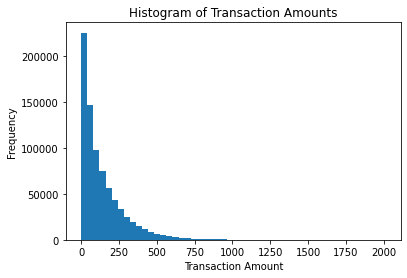

In [ ]:
# create a histogram of transaction amounts
plt.hist(data['transactionAmount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()

Text(0.5, 0.98, 'Data Distribution of Numerical Data')

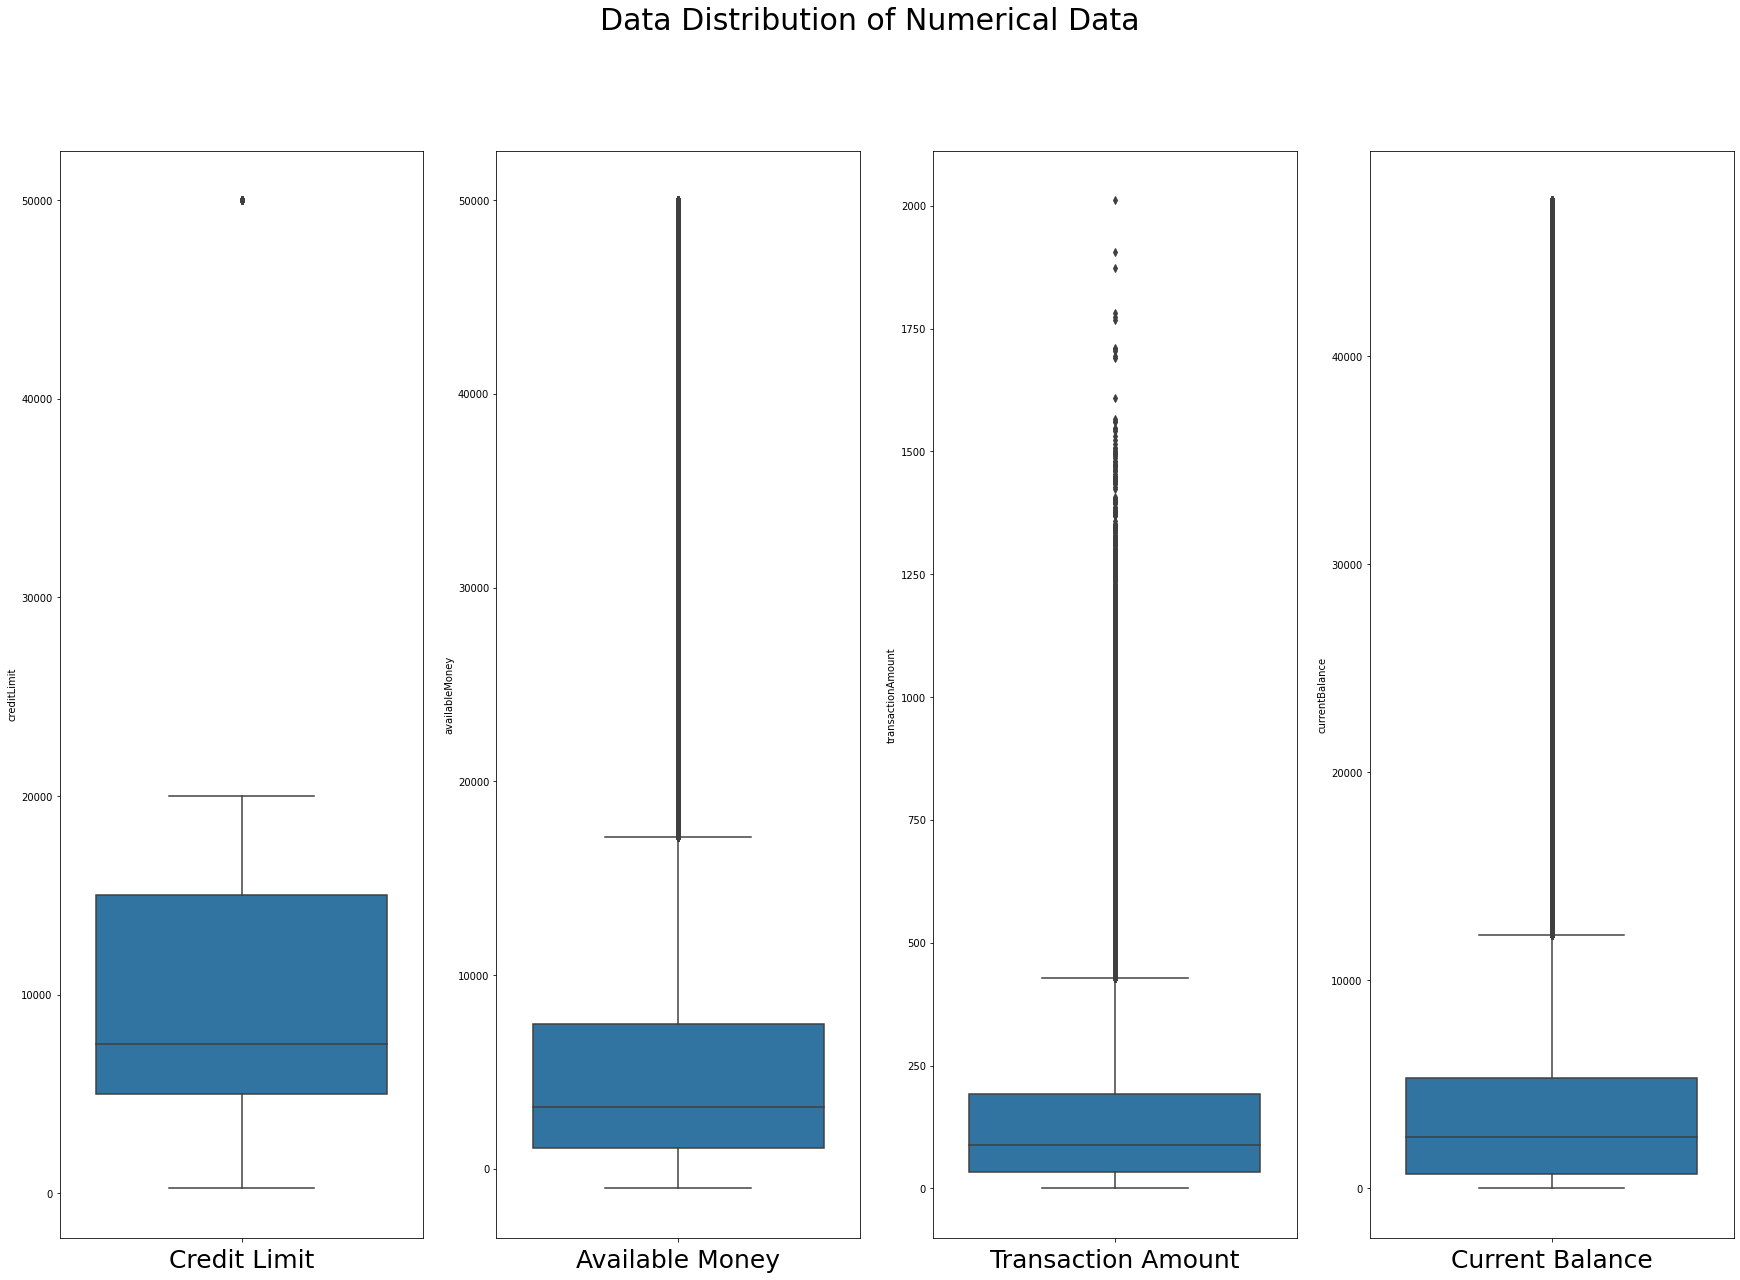

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

num_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
num_names = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']

for i in range(len(num)):
    sns.boxplot(data=data, y=num_cols[i], ax=ax[i],orient='v')
    ax[i].set_xlabel(num_names[i], fontsize=25)
plt.suptitle('Data Distribution of Numerical Data',fontsize=30)


Text(0.5, 1.0, 'Proportion of Faudulent transactions')

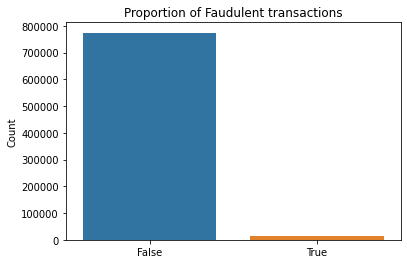

In [ ]:
fraud_vals = data['isFraud'].value_counts()

sns.barplot(x=[0,1], y=fraud_vals)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')
plt.title('Proportion of Faudulent transactions')

Text(0.5, 1.0, 'Top 10 Accounts with the Most Fraudulent Transactions')

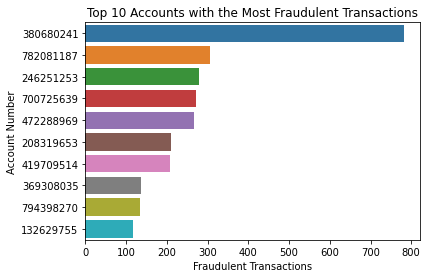

In [ ]:
fraud_transactions_only = data[data['isFraud'] == True]

top20_fraudulent_accounts = fraud_transactions_only['accountNumber'].value_counts().head(10)
sns.barplot(y=list(range(10)), x=top20_fraudulent_accounts.values, orient='h')

plt.yticks(ticks=list(range(10)), labels=top20_fraudulent_accounts.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraudulent Transactions')
plt.title('Top 10 Accounts with the Most Fraudulent Transactions')

Text(0.5, 1.0, 'Predominant Merchants of Account 380680241')

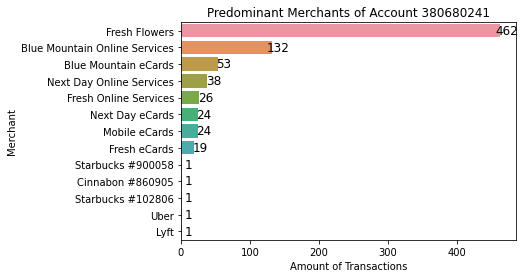

In [ ]:
fraud_king = top20_fraudulent_accounts.index[0]
fraud_king_data = data[(data['accountNumber'] == fraud_king) & (data['isFraud'] == True)]
fraud_king_top_merchants = fraud_king_data['merchantName'].value_counts()

ax = sns.barplot(y=list(range(len(fraud_king_top_merchants))), x=fraud_king_top_merchants.values, orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.text(width+9.5  ,
        p.get_y()+p.get_height()/2. + 0.2,
        int(width),
        ha="center", fontsize=12)

plt.yticks(ticks=list(range(len(fraud_king_top_merchants))), labels=fraud_king_top_merchants.index.tolist())
plt.xlabel('Amount of Transactions')
plt.ylabel('Merchant')
plt.title('Predominant Merchants of Account 380680241')

##Wrangling

In [ ]:

# Convert transactionDateTime to datetime format
data["transactionDateTime"] = pd.to_datetime(data["transactionDateTime"], format="%Y-%m-%dT%H:%M:%S")

# Sort the data by transactionDateTime
data = data.sort_values("transactionDateTime")

# Identify reversed transactions
reversals = []
for i in range(1, len(data)):
    if data.iloc[i]["transactionAmount"] == data.iloc[i-1]["transactionAmount"] \
    and data.iloc[i]["accountNumber"] == data.iloc[i-1]["accountNumber"] \
    and data.iloc[i]["merchantName"] == data.iloc[i-1]["merchantName"] \
    and data.iloc[i]["merchantCategoryCode"] == data.iloc[i-1]["merchantCategoryCode"] \
    and data.iloc[i]["posEntryMode"] == data.iloc[i-1]["posEntryMode"] \
    and data.iloc[i]["transactionDateTime"] == data.iloc[i-1]["transactionDateTime"] + timedelta(seconds=1) \
    and data.iloc[i]["transactionType"] == "REVERSAL" \
    and data.iloc[i-1]["transactionType"] == "PURCHASE":
        reversals.append(i-1)
        reversals.append(i)

# Identify multi-swipe transactions
multi_swipes = []
for i in range(1, len(data)):
    if data.iloc[i]["transactionAmount"] == data.iloc[i-1]["transactionAmount"] \
    and data.iloc[i]["accountNumber"] == data.iloc[i-1]["accountNumber"] \
    and data.iloc[i]["merchantName"] == data.iloc[i-1]["merchantName"] \
    and data.iloc[i]["merchantCategoryCode"] == data.iloc[i-1]["merchantCategoryCode"] \
    and data.iloc[i]["posEntryMode"] == data.iloc[i-1]["posEntryMode"] \
    and data.iloc[i]["transactionDateTime"] - data.iloc[i-1]["transactionDateTime"] < timedelta(seconds=10) \
    and data.iloc[i]["transactionType"] == "PURCHASE" \
    and data.iloc[i-1]["transactionType"] == "PURCHASE":
        multi_swipes.append(i-1)
        multi_swipes.append(i)

# Compute total number of transactions and total dollar amount for reversed transactions
num_reversals = len(reversals) // 2
total_amount_reversed = np.abs(data.iloc[reversals]["transactionAmount"]).sum()

# Compute total number of transactions and total dollar amount for multi-swipe transactions
num_multi_swipes = len(multi_swipes) // 2
total_amount_multi_swipes = np.abs(data.iloc[multi_swipes]["transactionAmount"]).sum()

print("Number of reversed transactions:", num_reversals)
print("Total amount of reversed transactions:", total_amount_reversed)
print("Number of multi-swipe transactions:", num_multi_swipes)
print("Total amount of multi-swipe transactions:", total_amount_multi_swipes)

Number of reversed transactions: 25
Total amount of reversed transactions: 5654.740000000001
Number of multi-swipe transactions: 332
Total amount of multi-swipe transactions: 92100.98


##Data Preprocessing

In [ ]:
# Create a new column indicating whether the card CVV matches the entered CVV
data['matchingCVV'] = data['cardCVV'] == data['enteredCVV']

# Convert boolean columns to 0 or 1
for col in ['cardPresent', 'matchingCVV', 'expirationDateKeyInMatch', 'isFraud']:
    data[col] = data[col].replace({False: 0, True: 1})

# Save the account number column to a separate variable
account_number = data['accountNumber']

# Remove unnecessary columns from the DataFrame
data.drop(['echoBuffer',
         'cardLast4Digits',
         'merchantName',
         'accountOpenDate',
         'transactionDateTime',
         'currentExpDate',
         'customerId',
         'dateOfLastAddressChange',
         'accountNumber',
         'enteredCVV',
         'cardCVV',
         ], inplace=True, axis=1)

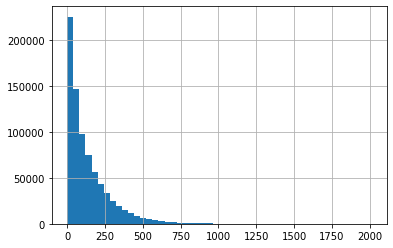

In [ ]:
data['transactionAmount'].hist(bins=50)
plt.show()

##Q2 : Data Preprocessing


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset into a pandas DataFrame
#data = pd.read_json('credit_card_transactions.json', lines=True)

# Drop irrelevant columns
data.drop(['accountNumber', 'customerId', 'merchantCity', 'merchantState', 'merchantZip', 'echoBuffer', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('isFraud', axis=1), data['isFraud'], test_size=0.2, random_state=42)

# Preprocess the data
numeric_features = ['creditLimit', 'availableMoney', 'transactionAmount']
categorical_features = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)




In [ ]:
#drop unwanted columns
data.drop(['accountNumber', 'customerId', 'merchantCity', 'merchantState', 'merchantZip', 'echoBuffer', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)

#encode boolean variables to binary integer variables
for col in ['cardPresent', 'expirationDateKeyInMatch', 'isFraud']:
    data[col] = data[col].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('isFraud', axis=1), data['isFraud'], test_size=0.2, random_state=42)

#onehot encoding the categorical variables and standard scaling the numeric variables

numeric_features = ['creditLimit', 'availableMoney', 'transactionAmount']
categorical_features = ['cardPresent', 'expirationDateKeyInMatch','acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[154748     32]
 [  2481     12]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       0.27      0.00      0.01      2493

    accuracy                           0.98    157273
   macro avg       0.63      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



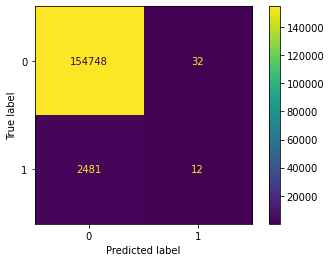

In [ ]:
# Train a logistic regression model
model = LogisticRegression(random_state=42, )
model.fit(X_train_processed, y_train)
 
# Make predictions on the test set
y_pred_logreg = model.predict(X_test_processed)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_processed, y_test)
plt.show()

[[154780      0]
 [  2493      0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       0.00      0.00      0.00      2493

    accuracy                           0.98    157273
   macro avg       0.49      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



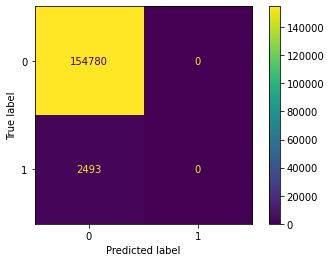

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_processed)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(rf, X_test_processed, y_test)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_processed)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(svm, X_test_processed, y_test)
plt.show()


#Data Preprocessing

In [ ]:
df = data

df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']

for col in ['cardPresent', 'matchingCVV', 'expirationDateKeyInMatch', 'isFraud']:
    df[col] = df[col].replace({False: 0, True: 1})
account_number = df['accountNumber']
df.drop(['echoBuffer',
         'cardLast4Digits',
         'merchantName',
         'accountOpenDate',
         'transactionDateTime',
         'currentExpDate',
         'customerId',
         'dateOfLastAddressChange',
         'accountNumber',
         'enteredCVV',
         'cardCVV',
         'merchantCity',
         'merchantState',
         'merchantZip',
         'posOnPremises',
         'recurringAuthInd'
         ], inplace=True, axis=1)

KeyError: ignored

In [ ]:
df.columns[df.dtypes != object]

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud', 'matchingCVV'],
      dtype='object')

In [ ]:

#encode boolean variables to binary integer variables
for col in ['cardPresent', 'expirationDateKeyInMatch', 'isFraud']:
    df[col] = df[col].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('isFraud', axis=1), df['isFraud'], test_size=0.2, random_state=42)

#onehot encoding the categorical variables and standard scaling the numeric variables

numeric_features = ['creditLimit', 'availableMoney', 'transactionAmount','currentBalance']
categorical_features = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'transactionType']
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

[[154780      0]
 [  2493      0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       0.00      0.00      0.00      2493

    accuracy                           0.98    157273
   macro avg       0.49      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py

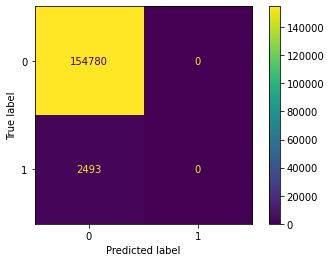

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_processed, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_processed)
# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

plot_confusion_matrix(rf, X_test_processed, y_test)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[154778      2]
 [  2493      0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       0.00      0.00      0.00      2493

    accuracy                           0.98    157273
   macro avg       0.49      0.50      0.50    157273
weighted avg       0.97      0.98      0.98    157273



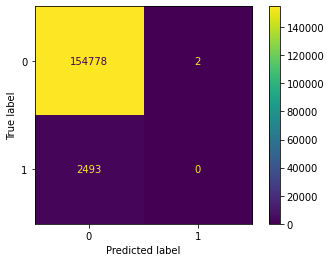

In [ ]:
# Train a logistic regression model
model = LogisticRegression(random_state=42, )
model.fit(X_train_processed, y_train)
 
# Make predictions on the test set
y_pred_logreg = model.predict(X_test_processed)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_processed, y_test)
plt.show()